In [1]:
!pip install yfinance --quiet

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\Thinkpad\\AppData\\Roaming\\Python\\Python39\\site-packages\\~-ndas\\_libs\\algos.cp39-win_amd64.pyd'
Check the permissions.



In [2]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
import statsmodels.api as sm

In [3]:
#define the ticker symbol 
tickerSymbol='SPY'

In [4]:
#get data on this ticker 
tickerData = yf.Ticker(tickerSymbol)

In [5]:
#get the historical prices for this ticker 
tickerDf = tickerData.history(period='1d',start='2015-1-1',end='2020-1-1')

In [6]:
TICKERDf=tickerDf[['Close']]

In [7]:
#see your data
tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2015-01-02 00:00:00-05:00,177.606471,178.036761,175.713185,176.788910,121465900,0.0,0.0,0.0
2015-01-05 00:00:00-05:00,175.704579,175.876692,173.277751,173.596161,169632600,0.0,0.0,0.0
2015-01-06 00:00:00-05:00,173.914520,174.456689,171.134852,171.961014,209151400,0.0,0.0,0.0
2015-01-07 00:00:00-05:00,173.337951,174.456707,172.873244,174.103867,125346700,0.0,0.0,0.0
2015-01-08 00:00:00-05:00,175.566864,177.417119,175.549662,177.193359,147217800,0.0,0.0,0.0


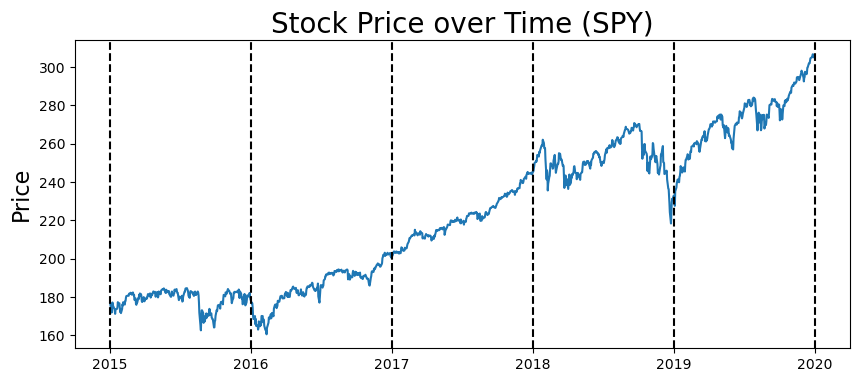

In [8]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol,fontsize=20)
plt.ylabel('Price',fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k',linestyle='--')

## stationarity 

In [9]:
#take first difference 
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate ([first_diffs,[0]])

In [10]:
#set the first difference as a variable in dataframe
tickerDf['FirstDifference']= first_diffs

In [11]:
tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,FirstDifference
Date,,,,,,,,,
2015-01-02 00:00:00-05:00,177.606471,178.036761,175.713185,176.788910,121465900,0.0,0.0,0.0,-3.192749
2015-01-05 00:00:00-05:00,175.704579,175.876692,173.277751,173.596161,169632600,0.0,0.0,0.0,-1.635147
2015-01-06 00:00:00-05:00,173.914520,174.456689,171.134852,171.961014,209151400,0.0,0.0,0.0,2.142853
2015-01-07 00:00:00-05:00,173.337951,174.456707,172.873244,174.103867,125346700,0.0,0.0,0.0,3.089493
2015-01-08 00:00:00-05:00,175.566864,177.417119,175.549662,177.193359,147217800,0.0,0.0,0.0,-1.419968


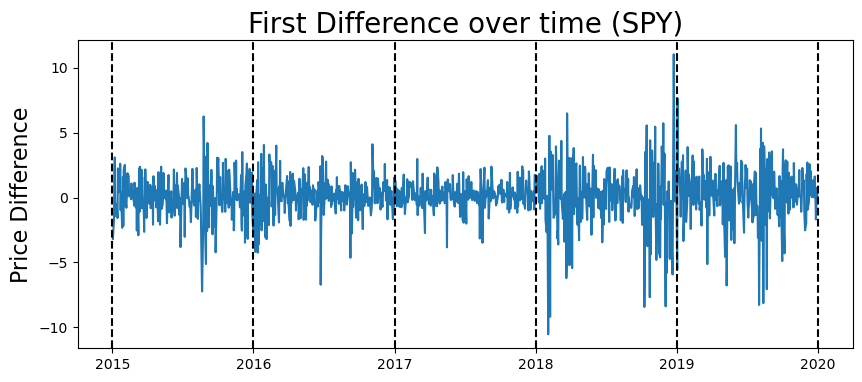

In [12]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over time ({})'.format(tickerSymbol), fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--')

### ACF

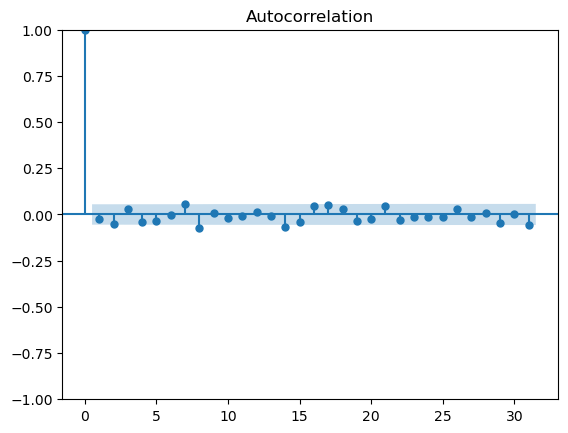

In [13]:
acf_plot= plot_acf(tickerDf.FirstDifference)

### PACF

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


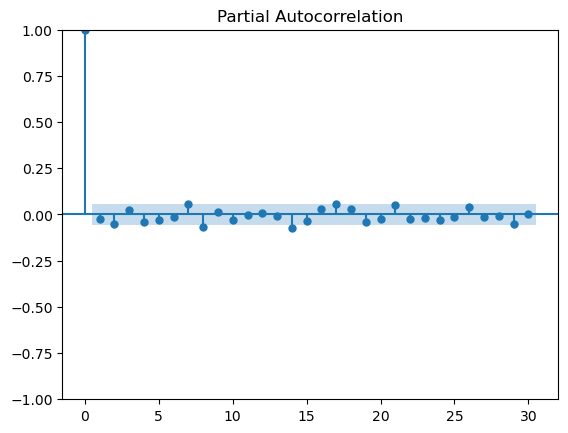

In [14]:
pacf_plot = plot_pacf(tickerDf['FirstDifference'].dropna(), lags=30)
